<a href="https://colab.research.google.com/github/313chengpeng/Analysis-of-tweets-about-chatgpt/blob/main/chatgpt_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


"A collection of tweets with the hashtag #chatgpt : discussions about the chatgpt language model, sharing experiences with using chatgpt, or asking for help with chatgpt-related issues. The tweets could also include links to articles or websites related to chatgpt, as well as images, videos, or other media. Overall, a collection of tweets with the hashtag #chatgpt would provide a glimpse into the online conversation surrounding chatgpt."

https://www.kaggle.com/datasets/konradb/chatgpt-the-tweets

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bigdata/tweets.csv', encoding='utf8')
df.head(10)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,AGI.Eth | MTL.Eth,"MathGPT\n\nUse GPT3 to solve math problems, an...","Montréal, Québec",VINCENTBOUCHER.Eth | President at @Montreal_AI...,2010-08-09 20:29:17+00:00,155942.0,2607.0,196358,False,2023-02-24 15:39:55+00:00,NaN,Twitter for iPhone
1,Bogo vlog,chat gpt it's a marvel of technology.\nthose m...,NaN,okay let's go,2023-01-24 05:34:06+00:00,11.0,20.0,55,False,2023-02-24 15:39:53+00:00,"['ChatGPT', 'chatbot']",Twitter for iPad
2,Leeyen Hazarika,One thing that's scary is science gathers know...,NaN,"District Transport Officer, Assam",2011-01-07 10:59:18+00:00,634.0,75.0,82,False,2023-02-24 15:39:46+00:00,"['AI', 'ChatGPT', 'OpenAI']",Twitter Web App
3,Alan Challis,@BardAiGoogle #CannabisCommunity \n #Developer...,Delaware,Love domain names!,2016-08-25 20:21:58+00:00,275.0,1264.0,947,False,2023-02-24 15:39:27+00:00,"['CannabisCommunity', 'DeveloperStudentClubs',...",Twitter Web App
4,Beat The Appraiser,"Fake Reality: Video Game ""Loss""\nReality: Juve...",NaN,Value Truth. Accurate measurement AND independ...,2021-08-04 16:48:42+00:00,201.0,977.0,636,False,2023-02-24 15:39:23+00:00,"['ai', 'chatgpt', 'ar', 'REALITY']",Twitter for iPhone
5,The COST 🇮🇳,So #chatGPT bot eligible to apply for license ...,India,Costing Finance Audit Tax (C-FAT) \ncontact@th...,2019-10-24 13:17:23+00:00,8955.0,6.0,3843,False,2023-02-24 15:38:41+00:00,['chatGPT'],Twitter for Android
6,Whispers In The Corridors,ChatGPT fails Civil Services Exam!\nLink: http...,India,"INDIA’S PIONEER IN BUREAUCRACY, POLITICS & COR...",2012-06-30 06:44:07+00:00,1925.0,148.0,355,False,2023-02-24 15:38:02+00:00,"['chatgpt', 'chatgptindia', 'openai', 'civilse...",Twitter Web App
7,CoffeeCandy,"@BeepSatire LoL, you're funny!\n#ChatGPT","Greenville, South Carolina",Coffee Lover,2022-07-26 21:10:18+00:00,26.0,121.0,52,False,2023-02-24 15:37:57+00:00,['ChatGPT'],Twitter Web App
8,~ALY~,This seems to be the closest I’m gonna get to ...,NaN,"~I'm Aly & I'm Fabulous~ Attorney, writer.. My...",2010-07-07 16:57:49+00:00,927.0,2132.0,10554,False,2023-02-24 15:37:56+00:00,"['python', 'chatgpt']",Twitter for iPhone
9,Sturdy Business,Finding clients takes time and effort. Be pati...,NaN,We help #smallbusinesses grow with practical i...,2019-05-25 10:43:48+00:00,321.0,202.0,8332,False,2023-02-24 15:37:48+00:00,NaN,Twitter for Android


In [13]:
pip install pyecharts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 12.5 MB/s eta 0:00:00


In [16]:
import pyecharts
from pyecharts.charts import Bar

In [5]:
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')

In [ ]:
# checking dataset

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  201547
Columns  :  12

Features : 
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values :   176076

Unique values :  
 user_name            97277
text                189920
user_location        24757
user_description     96086
user_created         98950
user_followers       24858
user_friends         14207
user_favourites      34046
user_verified           28
date                184170
hashtags             44165
source                 726
dtype: int64


# 统计这个文件对应的时间跨度

In [20]:
from datetime import datetime
from pyecharts.charts import Bar
from pyecharts import options as opts

In [51]:
# 将'date'列转换为datetime格式，无法转换的值设为缺失值
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 删除包含缺失值的行
df = df.dropna()
df = df.reset_index(drop=True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
# # 将字符串转换为时间数据
# df['date'] = pd.to_datetime(df['date'], errors='coerce')

# # 删除无效数据
# df.dropna(subset=['date'], inplace=True)

# 统计每个日期对应的数据数量
date_count = df['date'].value_counts().sort_index()

# 绘制柱状图
bar = (
    Bar()
    .add_xaxis(date_count.index.tolist())
    .add_yaxis('', date_count.tolist()) 
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45)),
        title_opts=opts.TitleOpts(title='Date Count')
    )
)

# 显示图表
bar.render_notebook()
# 保存图表
bar.render("Date Count.HTML")

'/content/Date Count.HTML'

In [54]:
df.to_csv('data_precess.csv')

#Users and followers

In [55]:
def convert_to_number(x):
    try:
        return float(x)
    except ValueError:
        return float('nan')

df['user_followers'] = df['user_followers'].apply(convert_to_number)

countA = len(df[df['user_followers'] < 1000])
countB =  len(df[df['user_followers'] > 1000])
print("Number of rows where column A is less than {}: {}".format(1000, countA))
print("Number of rows where column A is more than {}: {}".format(1000, countB))


Number of rows where column A is less than 1000: 68395
Number of rows where column A is more than 1000: 48604


#The NDTV: User with more followers

In [7]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

# User with the most followers

df[df['user_followers'] == df['user_followers'].max()]['user_name'].iloc[0]

'NDTV'

In [56]:
hin = df[(df['user_name']=="NDTV"
         )].reset_index(drop=True)
hin.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,NDTV,#TheNews | Google introduces #ChatGPT rival 'B...,India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48+00:00,17701716.0,12.0,60,True,2023-02-07,"['TheNews', 'ChatGPT']",Twitter Media Studio - LiveCut
1,NDTV,"#WeThePeople | ""It actually really helps"": Stu...",India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48+00:00,17699645.0,12.0,60,True,2023-02-05,"['WeThePeople', 'ChatGPT']",Twitter Media Studio
2,NDTV,"#WeThePeople | ""I use it when I am working on ...",India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48+00:00,17699645.0,12.0,60,True,2023-02-05,"['WeThePeople', 'ChatGPT']",Twitter Media Studio
3,NDTV,"#WeThePeople | ""People were worried about Goog...",India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48+00:00,17699645.0,12.0,60,True,2023-02-05,['WeThePeople'],Twitter Media Studio
4,NDTV,"#WeThePeople | ""You need to look at how techno...",India,Breaking news alerts from India.\n\nInstagram:...,2009-05-01 20:34:48+00:00,17699645.0,12.0,60,True,2023-02-05,['WeThePeople'],Twitter Media Studio


#User with more Friends: Jeff Sheehan Author | Mktg Consultant | Speaker

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

# video with the most comments

df['user_friends'] = df['user_friends'].apply(convert_to_number)

df[df['user_friends'] == df['user_friends'].max()]['user_name'].iloc[0]

'Roger James Hamilton'

#Cleaning functions

In [57]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

#remobe one character words
def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)


#break sentences to individual word list
def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    


def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)



def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
#%%

#https://stackoverflow.com/questions/55557004/getting-attributeerror-float-object-has-no-attribute-replace-error-while
#To avoid with tqdm AttributeError: 'float' object has no attribute

df["text"] = df["text"].astype(str)
df["text"] = [x.replace(':',' ') for x in df["text"]]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [58]:
df['clean_text'] = pd.Series([clean_text(i) for i in tqdm(df['text'])])

  0%|          | 0/117021 [00:00<?, ?it/s]

In [59]:
words = df["clean_text"].values

In [60]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

ls = []

for i in words:
    ls.append(str(i))

In [61]:
from wordcloud import WordCloud, STOPWORDS

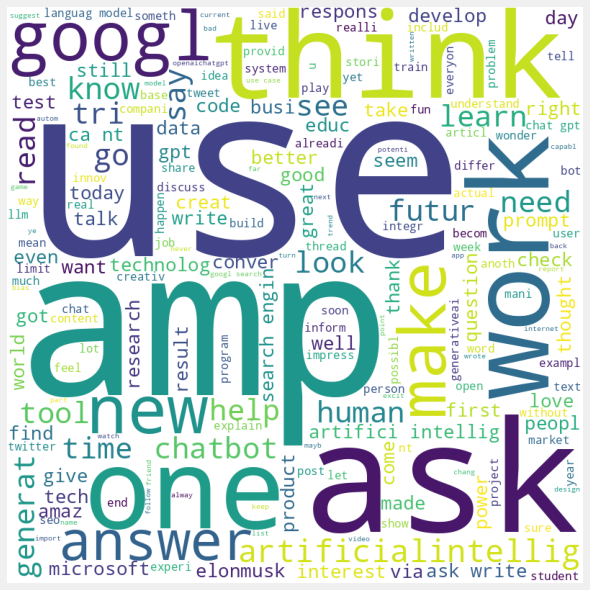

In [62]:
stop_words = set(stopwords.words('english') + list(STOPWORDS))
tokens = nltk.word_tokenize(" ".join(ls))
tokens = [token for token in tokens if token not in stop_words]

# 过滤常用的语气词
filter_words = ['i', 'chatgpt', 'ai', 'https', 'openai' ,'thing' , 'small', 'start' ,'you', 'he', 'she', 'it', 'we', 'they', 'am', 'is', 'are', 'was', 'were', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could', 'would', 'should', 'will', 'shall', 'may', 'might', 'must']
tokens = [token for token in tokens if token not in filter_words]

# 生成词云图
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(" ".join(tokens))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

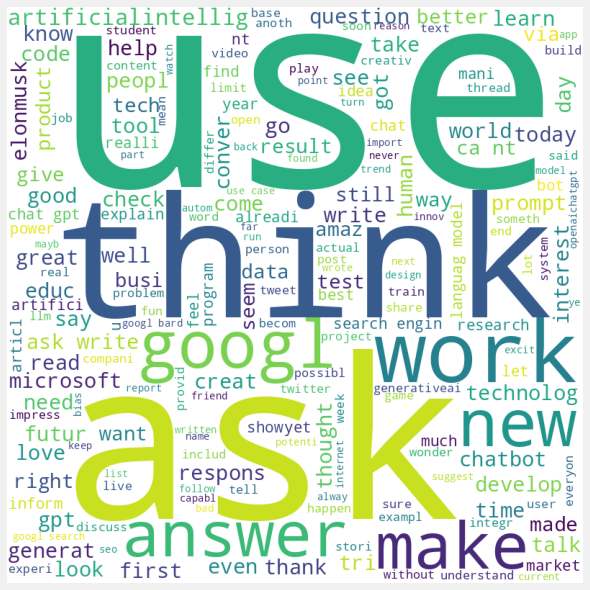

In [63]:
filter_words = ['i', 'amp','chang','artificalintellig' ,'tcogfhukqnqz','chatgpt', 'ai', 'https', 'openai' ,'thing' , 'small', 'start' ,'one', 'artifical', 'intellig' ,'you', 'he', 'she', 'it', 'we', 'they', 'am', 'is', 'are', 'was', 'were', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could', 'would', 'should', 'will', 'shall', 'may', 'might', 'must']
tokens = [token for token in tokens if token not in filter_words]

# 生成词云图
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(" ".join(tokens))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 后面内容未使用

In [ ]:
ls[:5]

['end twitter thread ai chatgpt openai https tcohonhwcvzi',
 'chatgpt truli mindblow tool play around definit send rabbit hole also actual help market content creation five way leverag chatgpt workflow chatgpt https tcochtouudm',
 'chatgpt use generat malici code find research code chatgpt languag ai check point tool https tcoxfkpxkt',
 'use prompt hack bypass openai content polici restrict golfzert https tconmbkthozd amp openai chatgpt hackerish thing nodatafound https tcogceotvckkq openai chatgpt ai gpt aitextgener secur bug issu hack hack https tcoiqukji',
 'chatgpt never replac dev https tcodrnbmti']

(-0.5, 1599.5, 799.5, -0.5)

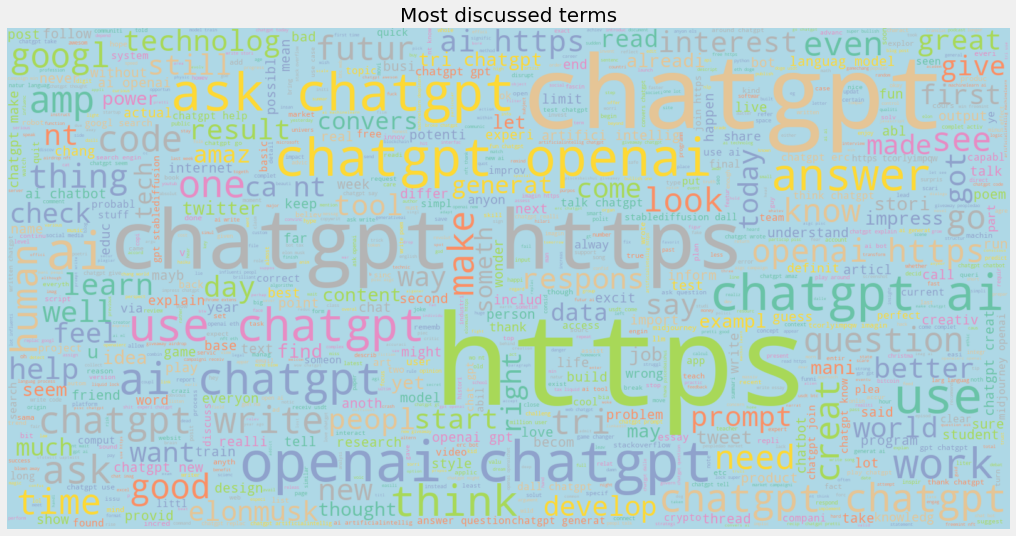

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

# The wordcloud 
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="lightblue", colormap='Set2', max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Set2' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

#I don't have (explicit) target. Then I'll try some of the features.

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

most_pop = df.sort_values('user_followers', ascending =False)[['user_name', 'user_followers']].head(12)

most_pop['user_followers1'] = most_pop['user_followers']/1000

#Since text delivered tiny fontsize that I couldn't read I changed to user name

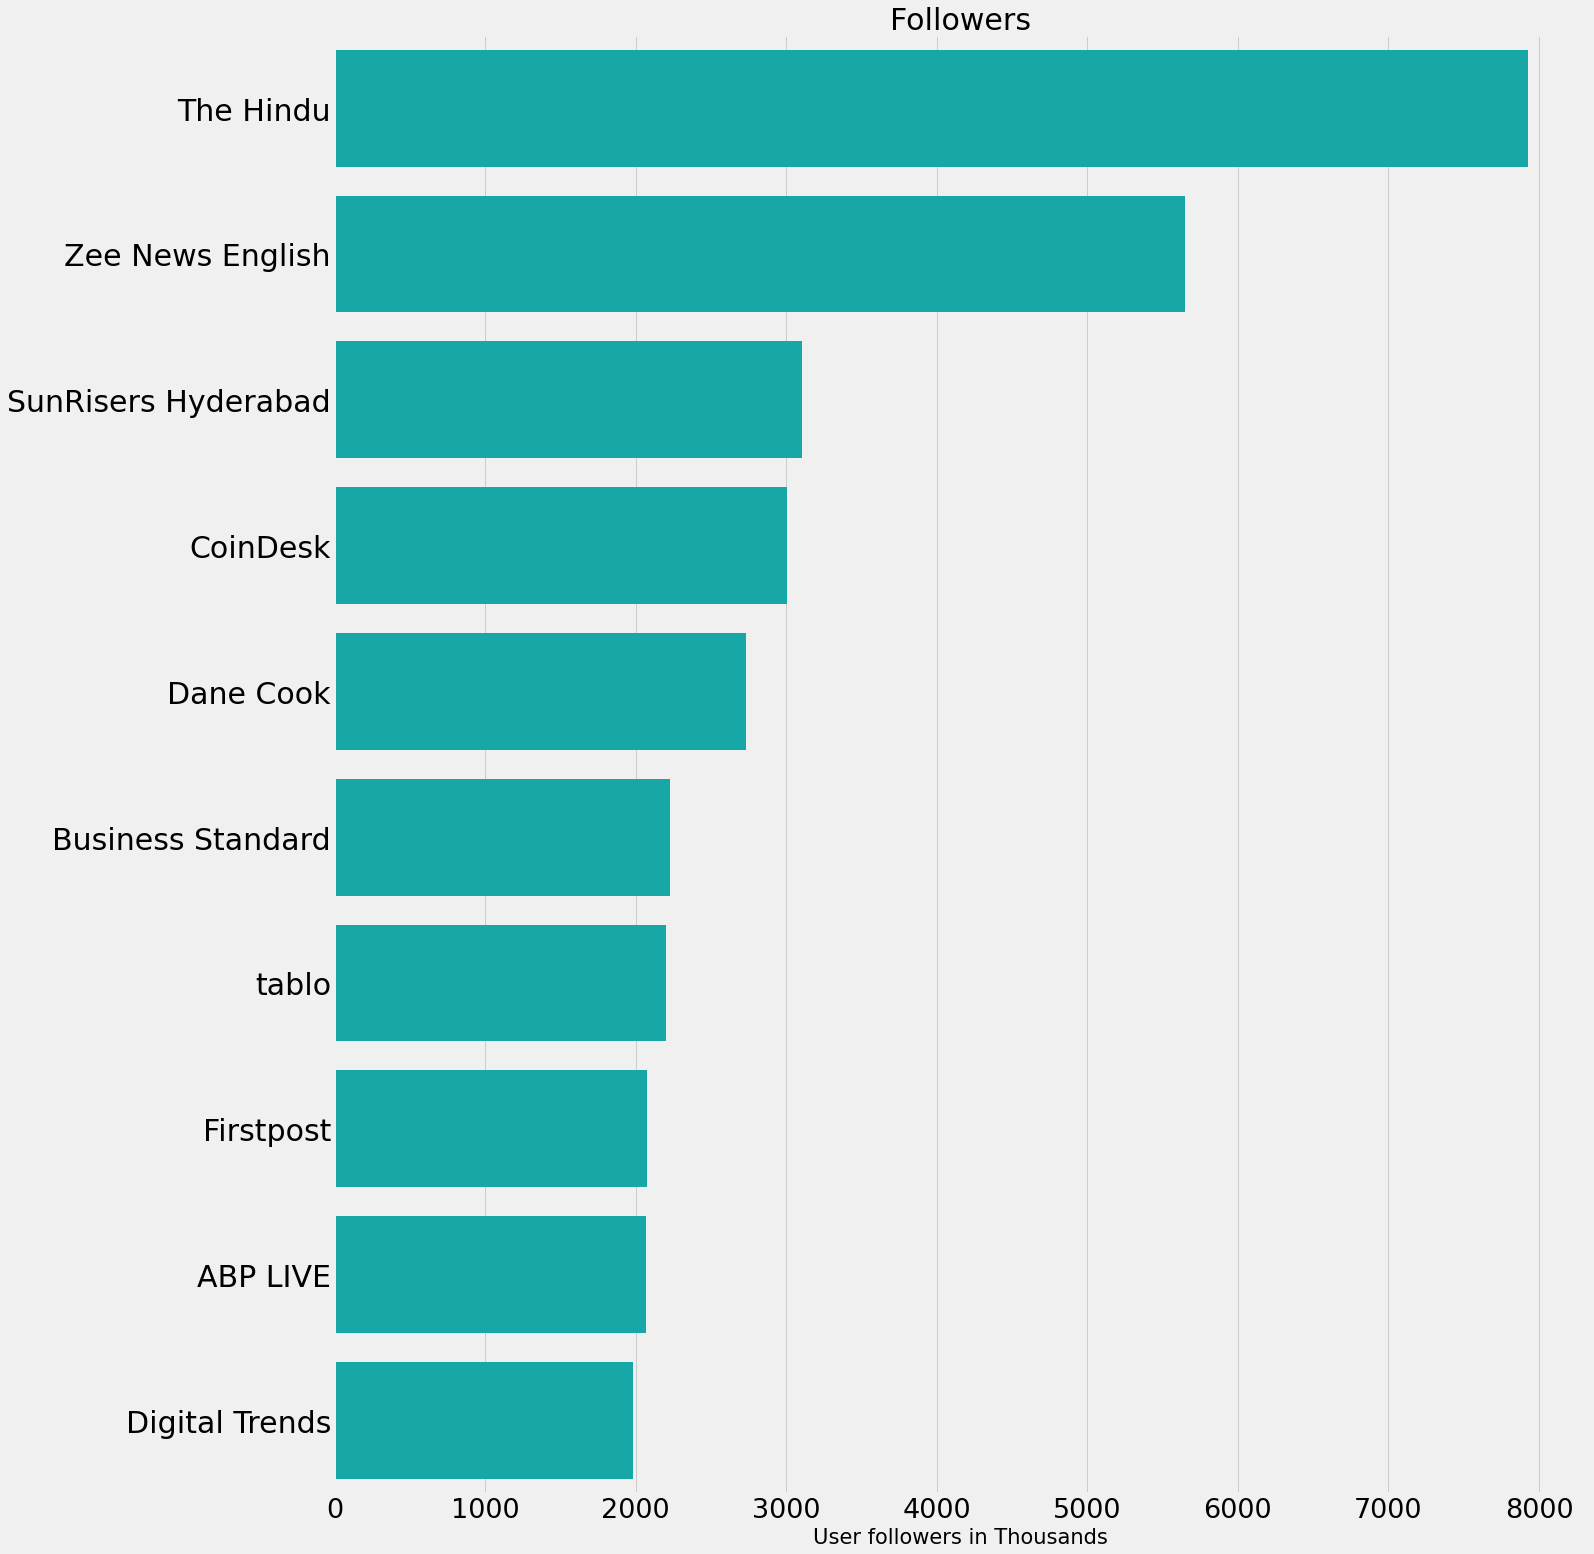

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

plt.figure(figsize = (20,25))

sns.barplot(data = most_pop, y = 'user_name', x = 'user_followers1', color = 'c')
plt.xticks(fontsize=27, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.xlabel('User followers in Thousands', fontsize = 21)
plt.ylabel('')
plt.title('Followers', fontsize = 30);

#Dane Cook??? Really Dane Cook?

"Dane Jeffrey Cook is an American stand-up comedian and film actor.   He performed an HBO special in late 2006, Vicious Circle, a straight-to-DVD special titled Rough Around The Edges (which is included in the album of the same name), and a Comedy Central special in 2009 titled Isolated Incident. He is known for his use of observational, often vulgar, and sometimes dark comedy."

https://en.wikipedia.org/wiki/Dane_Cook

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
df['text'].iloc[2]

'#ChatGPT can be used to generate malicious code, finds research\n\n#code #chatgpt #language #ai #check #point #tools \n\nhttps //t.co/x5fkP14XKT'

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

doc_sample = df['text'].iloc[1]
print('original document: ')

words = []

for word in doc_sample.split(' '):
    words.append(word)
    
    
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['ChatGPT', 'is', 'a', 'truly', 'mind-blowing', 'tool', 'and', 'playing', 'around', 'with', 'it', 'will', 'definitely', 'send', 'you', 'down', 'a', 'rabbit', 'hole,', 'but', 'it', 'can', 'also', 'actually', 'help', 'you', 'with', 'your', 'marketing', 'and', 'content', 'creation.\n\nHere', 'are', 'five', 'ways', 'to', 'leverage', 'ChatGPT', 'in', 'your', 'workflow.\n#ChatGPT...', 'https', '//t.co/ch6TOuuDm4']


 tokenized and lemmatized document: 
['chatgpt', 'truli', 'mind', 'blow', 'tool', 'play', 'definit', 'send', 'rabbit', 'hole', 'actual', 'help', 'market', 'content', 'creation', 'way', 'leverag', 'chatgpt', 'workflow', 'chatgpt', 'https', 'touudm']


In [ ]:
df['clean_text'] = df['clean_text'].astype(str)

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

words = []

for i in df['clean_text']:
        words.append(i.split(' '))

#Create the dictionary

Every unique word in texts

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

dictionary = gensim.corpora.Dictionary(words)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 ai
1 chatgpt
2 end
3 https
4 openai
5 tcohonhwcvzi
6 thread
7 twitter
8 actual
9 also
10 around


In [ ]:
# Filter out tokens in the dictionary by their frequency.

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

#Create Corpus -> term document frequency

doc2bow() simply counts the number of occurrences of each distinct word, converts the word to its integer word ID and returns the result as a sparse vector.

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in words]
bow_corpus[4310]

[(12, 1),
 (66, 1),
 (70, 1),
 (187, 1),
 (530, 1),
 (920, 1),
 (2191, 1),
 (2211, 1),
 (2448, 1),
 (2606, 1)]

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 12 ("help") appears 1 time.
Word 66 ("think") appears 1 time.
Word 70 ("everyon") appears 1 time.
Word 187 ("back") appears 1 time.
Word 530 ("machin") appears 1 time.
Word 920 ("insid") appears 1 time.
Word 2191 ("pros") appears 1 time.
Word 2211 ("goe") appears 1 time.
Word 2448 ("con") appears 1 time.
Word 2606 ("brave") appears 1 time.


#TF/IDF

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.18976005805614832),
 (1, 0.570250537144782),
 (2, 0.22366929302839567),
 (3, 0.5623793150340065),
 (4, 0.5220220288749071)]


In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=10,
                                       id2word=dictionary,
                                       passes=2,
                                       workers=2)

#Show the output of the model

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.034*"" + 0.025*"ai" + 0.016*"openai" + 0.012*"game" + 0.012*"year" + 0.010*"use" + 0.009*"like" + 0.008*"see" + 0.008*"time" + 0.007*"us"
Topic: 1 
Words: 0.021*"" + 0.021*"know" + 0.016*"answer" + 0.016*"nt" + 0.012*"say" + 0.012*"question" + 0.011*"use" + 0.011*"ask" + 0.010*"like" + 0.010*"openai"
Topic: 2 
Words: 0.014*"ai" + 0.014*"tri" + 0.013*"openai" + 0.012*"mind" + 0.011*"crypto" + 0.011*"convers" + 0.011*"free" + 0.010*"model" + 0.010*"new" + 0.010*"ask"
Topic: 3 
Words: 0.028*"googl" + 0.017*"ai" + 0.016*"use" + 0.016*"nt" + 0.015*"search" + 0.013*"openai" + 0.013*"answer" + 0.011*"like" + 0.010*"work" + 0.010*"peopl"
Topic: 4 
Words: 0.015*"ai" + 0.014*"new" + 0.012*"write" + 0.010*"tri" + 0.010*"written" + 0.010*"" + 0.010*"come" + 0.009*"prompt" + 0.008*"one" + 0.007*"post"
Topic: 5 
Words: 0.040*"ask" + 0.019*"openai" + 0.014*"use" + 0.014*"ai" + 0.012*"good" + 0.011*"pretti" + 0.010*"stori" + 0.010*"think" + 0.010*"question" + 0.010*"fun"
Topic: 6 
W

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf,
                                             num_topics=10,
                                             id2word=dictionary,
                                             passes=2,
                                             workers=4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"ai" + 0.009*"openai" + 0.007*"use" + 0.006*"ask" + 0.006*"thought" + 0.005*"tweet" + 0.005*"generat" + 0.005*"way" + 0.005*"write" + 0.005*"open"
Topic: 1 Word: 0.011*"ai" + 0.010*"openai" + 0.009*"broke" + 0.006*"awesom" + 0.005*"good" + 0.005*"like" + 0.005*"intellig" + 0.005*"elonmusk" + 0.005*"ask" + 0.004*"think"
Topic: 2 Word: 0.015*"ask" + 0.012*"openai" + 0.007*"ai" + 0.007*"write" + 0.007*"poem" + 0.007*"question" + 0.007*"use" + 0.006*"go" + 0.006*"answer" + 0.006*"stackoverflow"
Topic: 3 Word: 0.011*"ai" + 0.009*"good" + 0.008*"openai" + 0.007*"get" + 0.007*"use" + 0.007*"amaz" + 0.006*"ask" + 0.005*"nt" + 0.005*"answer" + 0.005*"like"
Topic: 4 Word: 0.013*"googl" + 0.008*"openai" + 0.008*"search" + 0.008*"fun" + 0.007*"use" + 0.007*"ai" + 0.007*"answer" + 0.006*"think" + 0.006*"nt" + 0.006*"game"
Topic: 5 Word: 0.009*"ai" + 0.007*"" + 0.007*"openai" + 0.007*"love" + 0.006*"write" + 0.006*"wow" + 0.006*"use" + 0.005*"nt" + 0.005*"like" + 0.005*"futur"
T

#Sucker of ChatGPT

In [ ]:
#39049th row, 2nd column 

df.iloc[39049,1]

'Levels🙏🙏🙏,so happy for the chatGPT team for com8ng up with such a revolutionary idea.The FUTURE LOOKS BRIGHT.\n\n#ChatGPT https //t.co/1QOKv6YLwA'

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeq2nhB-_7sZRyS6IV0ioDKXjfdA8YXHkCo-jMh82fi1DUuW8p5tca60ZBIQbmp1ebhtA&usqp=CAU)https://makeameme.org/meme/ha-ha-sucker

#Don't forget to add that snippet below to avoid errors!

import nltk
nltk.download()

#I couldn't fix the NLTK Downloader installation above to go further.

In [ ]:
#Code by Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

unseen_document = 'so happy for the chatGPT team for com8ng up with such a revolutionary idea.The FUTURE LOOKS BRIGHT.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.887461245059967	 Topic: 0.015*"ai" + 0.014*"new" + 0.012*"write" + 0.010*"tri" + 0.010*"written"
Score: 0.012505906634032726	 Topic: 0.043*"write" + 0.026*"ai" + 0.025*"ask" + 0.019*"openai" + 0.014*"love"
Score: 0.012505127117037773	 Topic: 0.052*"ai" + 0.022*"use" + 0.015*"human" + 0.012*"openai" + 0.012*"generat"
Score: 0.01250489242374897	 Topic: 0.094*"openai" + 0.068*"ai" + 0.037*"gpt" + 0.019*"chat" + 0.019*"talk"
Score: 0.012504630722105503	 Topic: 0.040*"ask" + 0.019*"openai" + 0.014*"use" + 0.014*"ai" + 0.012*"good"
Score: 0.012504471465945244	 Topic: 0.021*"" + 0.021*"know" + 0.016*"answer" + 0.016*"nt" + 0.012*"say"
Score: 0.012504145503044128	 Topic: 0.028*"googl" + 0.017*"ai" + 0.016*"use" + 0.016*"nt" + 0.015*"search"
Score: 0.012504068203270435	 Topic: 0.034*"" + 0.025*"ai" + 0.016*"openai" + 0.012*"game" + 0.012*"year"
Score: 0.012502776458859444	 Topic: 0.014*"ai" + 0.014*"tri" + 0.013*"openai" + 0.012*"mind" + 0.011*"crypto"
Score: 0.012502755969762802	 Topi

![](https://res.cloudinary.com/practicaldev/image/fetch/s--Qnwum4Gg--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.redd.it/4e7ywl1kj74a1.png)https://dev.to/ben/meme-tuesday-5fdn/comments

#Acknowledgements:

Leon Wolber https://www.kaggle.com/leonwolber/reddit-nlp-topic-modeling-prediction

Dataset by Konrad Banachewicz https://www.kaggle.com/datasets/konradb/chatgpt-the-tweets